<a href="https://colab.research.google.com/github/tranvietphi20104051/baitapAI/blob/main/tranvietphinoicomdiendasua.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 993 kB 5.1 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=d3cb531c52f418941187c2c0abadac3b63300704815ae334ebd69f8921958b37
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


34.09199469976087


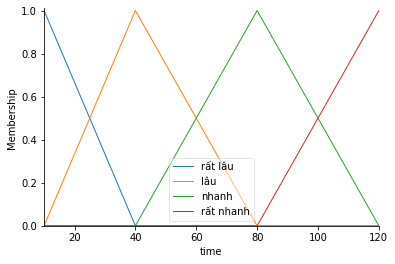

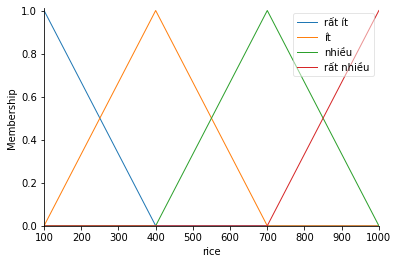

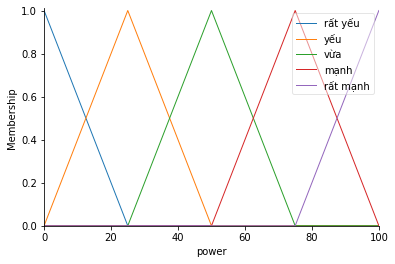

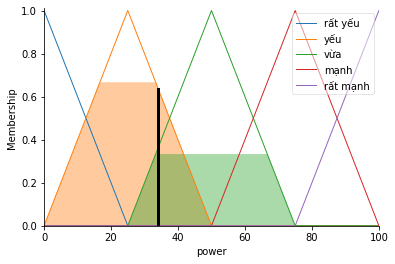

In [ ]:
from skfuzzy import control as ctrl
import numpy as np
import skfuzzy as fuzz
time = ctrl.Antecedent(np.arange(10,121,1),'time')
rice = ctrl.Antecedent(np.arange(100,1001,1),'rice')
power = ctrl.Consequent(np.arange(0,101,1),'power')

time['rất lâu'] = fuzz.trimf(time.universe,[10,10,40]) 
time['lâu'] = fuzz.trimf(time.universe,[10,40,80])
time['nhanh'] = fuzz.trimf(time.universe,[40,80,120])
time['rất nhanh'] = fuzz.trimf(time.universe,[80,120,120])
time.view()

rice['rất ít'] = fuzz.trimf(rice.universe,[100,100,400])
rice['ít'] = fuzz.trimf(rice.universe,[100,400,700])
rice['nhiều'] = fuzz.trimf(rice.universe,[400,700,1000])
rice['rất nhiều'] = fuzz.trimf(rice.universe,[700,1000,1000])
rice.view()

power['rất yếu'] = fuzz.trimf(power.universe,[0,0,25])
power['yếu'] = fuzz.trimf(power.universe,[0,25,50])
power['vừa'] = fuzz.trimf(power.universe,[25,50,75])
power['mạnh'] = fuzz.trimf(power.universe,[50,75,100])
power['rất mạnh'] = fuzz.trimf(power.universe,[75,100,100])
power.view()

rule1 = ctrl.Rule(time['rất lâu'] & rice['rất ít'],power['rất yếu'])
rule2 = ctrl.Rule(time['rất lâu'] & rice['ít'],power['rất yếu'])
rule3 = ctrl.Rule(time['rất lâu'] & rice['nhiều'],power['yếu'])
rule4 = ctrl.Rule(time['rất lâu'] & rice['rất nhiều'],power['vừa'])

rule5 = ctrl.Rule(time['lâu'] & rice['rất ít'],power['rất yếu'])
rule6 = ctrl.Rule(time['lâu'] & rice['ít'],power['yếu'])
rule7 = ctrl.Rule(time['lâu'] & rice['nhiều'],power['vừa'])
rule8 = ctrl.Rule(time['lâu'] & rice['rất nhiều'],power['mạnh'])

rule9 = ctrl.Rule(time['nhanh'] & rice['rất ít'],power['yếu'])
rule10 = ctrl.Rule(time['nhanh'] & rice['ít'],power['vừa'])
rule11 = ctrl.Rule(time['nhanh'] & rice['nhiều'],power['mạnh'])
rule12 = ctrl.Rule(time['nhanh'] & rice['rất nhiều'],power['rất mạnh'])

rule13 = ctrl.Rule(time['rất nhanh'] & rice['rất ít'],power['vừa'])
rule14 = ctrl.Rule(time['rất nhanh'] & rice['ít'],power['mạnh'])
rule15 = ctrl.Rule(time['rất nhanh'] & rice['nhiều'],power['rất mạnh'])
rule16 = ctrl.Rule(time['rất nhanh'] & rice['rất nhiều'],power['rất mạnh'])

tipping_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

tipping.input['time'] = 80
tipping.input['rice'] = 200 
tipping.compute() 

print(tipping.output['power']) 
power.view(sim = tipping)